# EFFECT OF PHYSICAL ACTIVITY ON SLEEP QUALITY

The effect of exercise on sleep has been studied extensively (For example, [Exercise reducing insomnia](https://www.hopkinsmedicine.org/health/wellness-and-prevention/exercising-for-better-sleep#:~:text=Exercise%20Decreases%20Insomnia,to%20medical%20treatments%20for%20insomnia.),[Interrelationship between exercise and sleep](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5385214/)). <br>

I have GoogleFit data from my smartwatch that tracks my sleep and physical activity. I will use that to understand the effect of time spent in various exercise zones on four stages of sleep. The quality of sleep is derived from
1. time in deep sleep
2. time in REM
3. time in light sleep
4. time awake

Before digging into the messy GoogleFit data, I will first use my personal database where I have recorded time spent walking and/or running and sleep data from my watch. There are three databases <br>
1. DataAnalysis Project - WalkingNOISE.csv
2. DataAnalysis Project - RunningNOISE.csv
3. DataAnalysis Project - SleepNOISE.csv

## Database

### DataAnalysis Project - WalkingNOISE.csv and DataAnalysis Project - RunningNOISE.csv

| date dd-mm-yyyy | Day | start time | distance km | duration hh:mm:ss | calories kcal | avgpace /km | avgspeed kmph | avgcadence /min | numsteps | avghr bpm | avgstride cm | aerobic m | anaerobic m | fatburn m | warmup m |
|-----------------|-----|------------|-------------|-------------------|---------------|-------------|---------------|-----------------|----------|-----------|--------------|-----------|-------------|-----------|----------|

In this preliminary data analysis, I will only keep date, duration, calories, avgspeed, avghr, aerobic, anaerobic, fatburn, warmup

### DataAnalysis Project - SleepNOISE.csv 

| date dd-mm-yyyy | day | sleep hours | start hh:mm AM/PM | end hh:mm AM/PM | deep sleep | light sleep | awake | REM | nap |
|-----------------|-----|-------------|-------------------|-----------------|------------|-------------|-------|-----|-----|

In this preliminary data analysis, I will only keep date, sleep hours, deep sleep, light sleep, awake, REM

## Column selection and merging databases

I have used SQL to perform the following steps. <br>

**Sleep**
1. Convert date from VARCHAR to DATE type (this will be the primary key)
2. Convert sleep from xxhxxm to minutes
3. Convert deep from xxhxxm to minutes
4. Convert light from xxhxxm to minutes
5. Convert awake from xxhxxm to minutes
6. Convert rem from xxhxxm to minutes

**Walk** and **Run**
1. Convert date from VARCHAR to DATE type (this will be the primary key)
2. Convert duration from h:mm:ss to minutes

All codes to perform the above operations are in the [SleepNExercise/sql_commands](https://github.com/sangeethankumar/sleepNexercise/tree/master/sql_commands)

From the above operations, I have the following tables. They are available as [csv files here](https://github.com/sangeethankumar/sleepNexercise/tree/master/data/data_after_merging)

1. sleep
2. walk
3. run
4. sleep_walk_run (merged)

## Data cleaning

In [36]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# sleep_walk_run
sleep_walk_run = pd.read_csv('data/data_after_merging/sleep_walk_run.csv')

In [4]:
sleep_walk_run.head()

,date,sleep,deep,light,awake,rem,duration,calories,avgspeed,avghr,...,fatburn,warmup,duration.1,calories.1,avgspeed.1,avghr.1,aerobic.1,anaerobic.1,fatburn.1,warmup.1
0,2021-12-20,422,103.0,319.0,51.0,NaN,26.0,344.0,4.70,168.0,...,2.0,3.0,31.0,414.0,5.72,167.0,19.0,9.0,1.0,0.0
1,2021-12-20,422,103.0,319.0,51.0,NaN,26.0,344.0,4.70,168.0,...,2.0,3.0,31.0,414.0,5.72,167.0,19.0,9.0,1.0,0.0
2,2021-12-20,422,103.0,319.0,51.0,NaN,31.0,414.0,5.72,167.0,...,1.0,0.0,31.0,414.0,5.72,167.0,19.0,9.0,1.0,0.0
3,2021-12-21,443,78.0,365.0,39.0,NaN,38.0,356.0,4.69,138.0,...,28.0,7.0,20.0,249.0,6.01,162.0,10.0,5.0,0.0,0.0
4,2021-12-21,443,78.0,365.0,39.0,NaN,38.0,356.0,4.69,138.0,...,28.0,7.0,20.0,249.0,6.01,162.0,10.0,5.0,0.0,0.0


In [5]:
sleep_walk_run = sleep_walk_run.rename(columns={'duration':'duration_walk', 'calories':'calories_walk', 
                   'avgspeed':'avgspeed_walk', 'avghr':'avghr_walk',
                   'aerobic':'aerobic_walk', 'anaerobic':'anaerobic_walk', 'fatburn':'fatburn_walk',
                   'warmup':'warmup_walk', 'duration.1':'duration_run', 
                   'calories.1':'calories_run', 'avgspeed.1':'avgspeed_run', 'avghr.1':'avghr_run',
                   'aerobic.1':'aerobic_run', 'anaerobic.1':'anaerobic_run', 'fatburn.1':'fatburn_run', 'warmup.1':'warmup_run'})
sleep_walk_run.columns

Index(['date', 'sleep', 'deep', 'light', 'awake', 'rem', 'duration_walk',
       'calories_walk', 'avgspeed_walk', 'avghr_walk', 'aerobic_walk',
       'anaerobic_walk', 'fatburn_walk', 'warmup_walk', 'duration_run',
       'calories_run', 'avgspeed_run', 'avghr_run', 'aerobic_run',
       'anaerobic_run', 'fatburn_run', 'warmup_run'],
      dtype='object')

In [6]:
sleep_walk_run[['sleep','deep','light','awake','rem']].isna().sum()

sleep    0
deep     3
light    3
awake    3
rem      9
dtype: int64

Removing null values from sleep parameters

In [7]:
remove_null = ['sleep','deep','light','awake','rem']
sleep_walk_run = sleep_walk_run.dropna(subset=remove_null)
sleep_walk_run

,date,sleep,deep,light,awake,rem,duration_walk,calories_walk,avgspeed_walk,avghr_walk,...,fatburn_walk,warmup_walk,duration_run,calories_run,avgspeed_run,avghr_run,aerobic_run,anaerobic_run,fatburn_run,warmup_run
6,2021-12-22,504,111.0,277.0,4.0,116.0,26.0,281.0,4.58,150.0,...,18.0,0.0,30.0,413.0,5.98,171.0,11.0,16.0,0.0,0.0
7,2021-12-22,504,111.0,277.0,4.0,116.0,30.0,413.0,5.98,171.0,...,0.0,0.0,30.0,413.0,5.98,171.0,11.0,16.0,0.0,0.0
8,2021-12-22,504,111.0,277.0,4.0,116.0,26.0,281.0,4.58,150.0,...,18.0,0.0,30.0,413.0,5.98,171.0,11.0,16.0,0.0,0.0
12,2021-12-24,401,83.0,201.0,0.0,117.0,38.0,418.0,4.71,151.0,...,22.0,3.0,98.0,1278.0,6.11,166.0,94.0,0.0,1.0,1.0
13,2021-12-24,401,83.0,201.0,0.0,117.0,38.0,418.0,4.71,151.0,...,22.0,3.0,98.0,1278.0,6.11,166.0,94.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2022-02-11,442,77.0,247.0,0.0,118.0,96.0,1187.0,6.25,161.0,...,3.0,0.0,96.0,1187.0,6.25,161.0,90.0,0.0,3.0,0.0
118,2022-02-12,492,79.0,285.0,6.0,128.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2022-02-13,458,85.0,230.0,0.0,143.0,115.0,1373.0,6.25,158.0,...,16.0,1.0,115.0,1373.0,6.25,158.0,94.0,0.0,16.0,1.0
120,2022-02-14,290,69.0,180.0,28.0,41.0,30.0,225.0,4.44,119.0,...,0.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sleep_walk_run[['sleep','deep','light','awake','rem']].isna().sum()

sleep    0
deep     0
light    0
awake    0
rem      0
dtype: int64

In [9]:
sleep_walk_run.columns

Index(['date', 'sleep', 'deep', 'light', 'awake', 'rem', 'duration_walk',
       'calories_walk', 'avgspeed_walk', 'avghr_walk', 'aerobic_walk',
       'anaerobic_walk', 'fatburn_walk', 'warmup_walk', 'duration_run',
       'calories_run', 'avgspeed_run', 'avghr_run', 'aerobic_run',
       'anaerobic_run', 'fatburn_run', 'warmup_run'],
      dtype='object')

In [10]:
sleep_cols = ['sleep', 'deep', 'light', 'awake', 'rem']
walk_cols = ['duration_walk',
       'calories_walk', 'avgspeed_walk', 'avghr_walk', 'aerobic_walk',
       'anaerobic_walk', 'fatburn_walk', 'warmup_walk']
run_cols = ['duration_run',
       'calories_run', 'avgspeed_run', 'avghr_run', 'aerobic_run',
       'anaerobic_run', 'fatburn_run', 'warmup_run']

In [11]:
sleep_walk_run[walk_cols].isna().sum()

duration_walk     8
calories_walk     8
avgspeed_walk     8
avghr_walk        8
aerobic_walk      8
anaerobic_walk    8
fatburn_walk      8
warmup_walk       8
dtype: int64

In [12]:
sleep_walk_run[run_cols].isna().sum()

duration_run     36
calories_run     36
avgspeed_run     36
avghr_run        36
aerobic_run      36
anaerobic_run    36
fatburn_run      36
warmup_run       36
dtype: int64

All features of walk and run can be 0 for dates where no entry for walk/run is null

In [13]:
# filling empty columns in walk and run features
sleep_walk_run[walk_cols] = sleep_walk_run[walk_cols].fillna(0)
sleep_walk_run[run_cols] = sleep_walk_run[run_cols].fillna(0)

In [14]:
sleep_walk_run.isna().sum().any()

False

There are no null values in the dataframe anymore

Feature engineering

In [15]:
sleep_walk_run['deep_prop'] = sleep_walk_run['deep'] / sleep_walk_run['sleep']
sleep_walk_run['light_prop'] = sleep_walk_run['light'] / sleep_walk_run['sleep'] 
sleep_walk_run['awake_prop'] = sleep_walk_run['awake'] / sleep_walk_run['sleep'] 
sleep_walk_run['rem_prop'] = sleep_walk_run['rem'] / sleep_walk_run['sleep'] 

In [16]:
sleep_walk_run['total_duration'] = sleep_walk_run['duration_walk'] + sleep_walk_run['duration_run']
sleep_walk_run['total_aerobic'] = sleep_walk_run['aerobic_walk'] + sleep_walk_run['aerobic_run']
sleep_walk_run['total_anaerobic'] = sleep_walk_run['anaerobic_walk'] + sleep_walk_run['anaerobic_run']
sleep_walk_run['total_fatburn'] = sleep_walk_run['fatburn_walk'] + sleep_walk_run['fatburn_run']
sleep_walk_run['total_warmup'] = sleep_walk_run['warmup_walk'] + sleep_walk_run['warmup_run']

In [17]:
sleep_walk_run.head()

,date,sleep,deep,light,awake,rem,duration_walk,calories_walk,avgspeed_walk,avghr_walk,...,warmup_run,deep_prop,light_prop,awake_prop,rem_prop,total_duration,total_aerobic,total_anaerobic,total_fatburn,total_warmup
6,2021-12-22,504,111.0,277.0,4.0,116.0,26.0,281.0,4.58,150.0,...,0.0,0.220238,0.549603,0.007937,0.230159,56.0,13.0,20.0,18.0,0.0
7,2021-12-22,504,111.0,277.0,4.0,116.0,30.0,413.0,5.98,171.0,...,0.0,0.220238,0.549603,0.007937,0.230159,60.0,22.0,32.0,0.0,0.0
8,2021-12-22,504,111.0,277.0,4.0,116.0,26.0,281.0,4.58,150.0,...,0.0,0.220238,0.549603,0.007937,0.230159,56.0,13.0,20.0,18.0,0.0
12,2021-12-24,401,83.0,201.0,0.0,117.0,38.0,418.0,4.71,151.0,...,1.0,0.206983,0.501247,0.000000,0.291771,136.0,100.0,5.0,23.0,4.0
13,2021-12-24,401,83.0,201.0,0.0,117.0,38.0,418.0,4.71,151.0,...,1.0,0.206983,0.501247,0.000000,0.291771,136.0,100.0,5.0,23.0,4.0


In [18]:
sleep_walk_run.isin([-np.inf,np.inf]).sum().any()

False

In [19]:
# creating a new dataframe with only interested features
sleep_activity_cols = ['date','sleep','deep','light','awake','rem',
                       'deep_prop','light_prop','awake_prop','rem_prop',
                       'total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']
sleep_activity = sleep_walk_run[sleep_activity_cols]
sleep_activity.head()

,date,sleep,deep,light,awake,rem,deep_prop,light_prop,awake_prop,rem_prop,total_duration,total_aerobic,total_anaerobic,total_fatburn,total_warmup
6,2021-12-22,504,111.0,277.0,4.0,116.0,0.220238,0.549603,0.007937,0.230159,56.0,13.0,20.0,18.0,0.0
7,2021-12-22,504,111.0,277.0,4.0,116.0,0.220238,0.549603,0.007937,0.230159,60.0,22.0,32.0,0.0,0.0
8,2021-12-22,504,111.0,277.0,4.0,116.0,0.220238,0.549603,0.007937,0.230159,56.0,13.0,20.0,18.0,0.0
12,2021-12-24,401,83.0,201.0,0.0,117.0,0.206983,0.501247,0.000000,0.291771,136.0,100.0,5.0,23.0,4.0
13,2021-12-24,401,83.0,201.0,0.0,117.0,0.206983,0.501247,0.000000,0.291771,136.0,100.0,5.0,23.0,4.0


I want to predict <br>
1. total sleep
2. deep sleep proportion
3. light sleep proportion
4. awake proportion
5. rem proportion

In [38]:
sleep_cols = ['sleep','total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']
deep_cols = ['deep_prop','total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']
light_cols = ['light_prop','total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']
awake_cols = ['awake_prop','total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']
rem_cols = ['rem_prop','total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']

In [39]:
sleep = sleep_walk_run[sleep_cols]
deep = sleep_walk_run[deep_cols]
light = sleep_walk_run[light_cols]
awake = sleep_walk_run[awake_cols]
rem = sleep_walk_run[rem_cols]

In [37]:
#rem.describe().transpose()

The features have non-comparable variances. I will standardize the features

In [40]:
sleep[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']] = StandardScaler().fit_transform(sleep[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']])
deep[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']] = StandardScaler().fit_transform(deep[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']])
light[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']] = StandardScaler().fit_transform(light[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']])
awake[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']] = StandardScaler().fit_transform(awake[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']])
rem[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']] = StandardScaler().fit_transform(rem[['total_duration','total_aerobic','total_anaerobic','total_fatburn','total_warmup']])

In [55]:
#rem.head()

## EDA

In [41]:
corr_sleep = sleep.corr()
corr_deep = deep.corr()
corr_light = light.corr()
corr_awake = awake.corr()
corr_rem = rem.corr()

<AxesSubplot:>

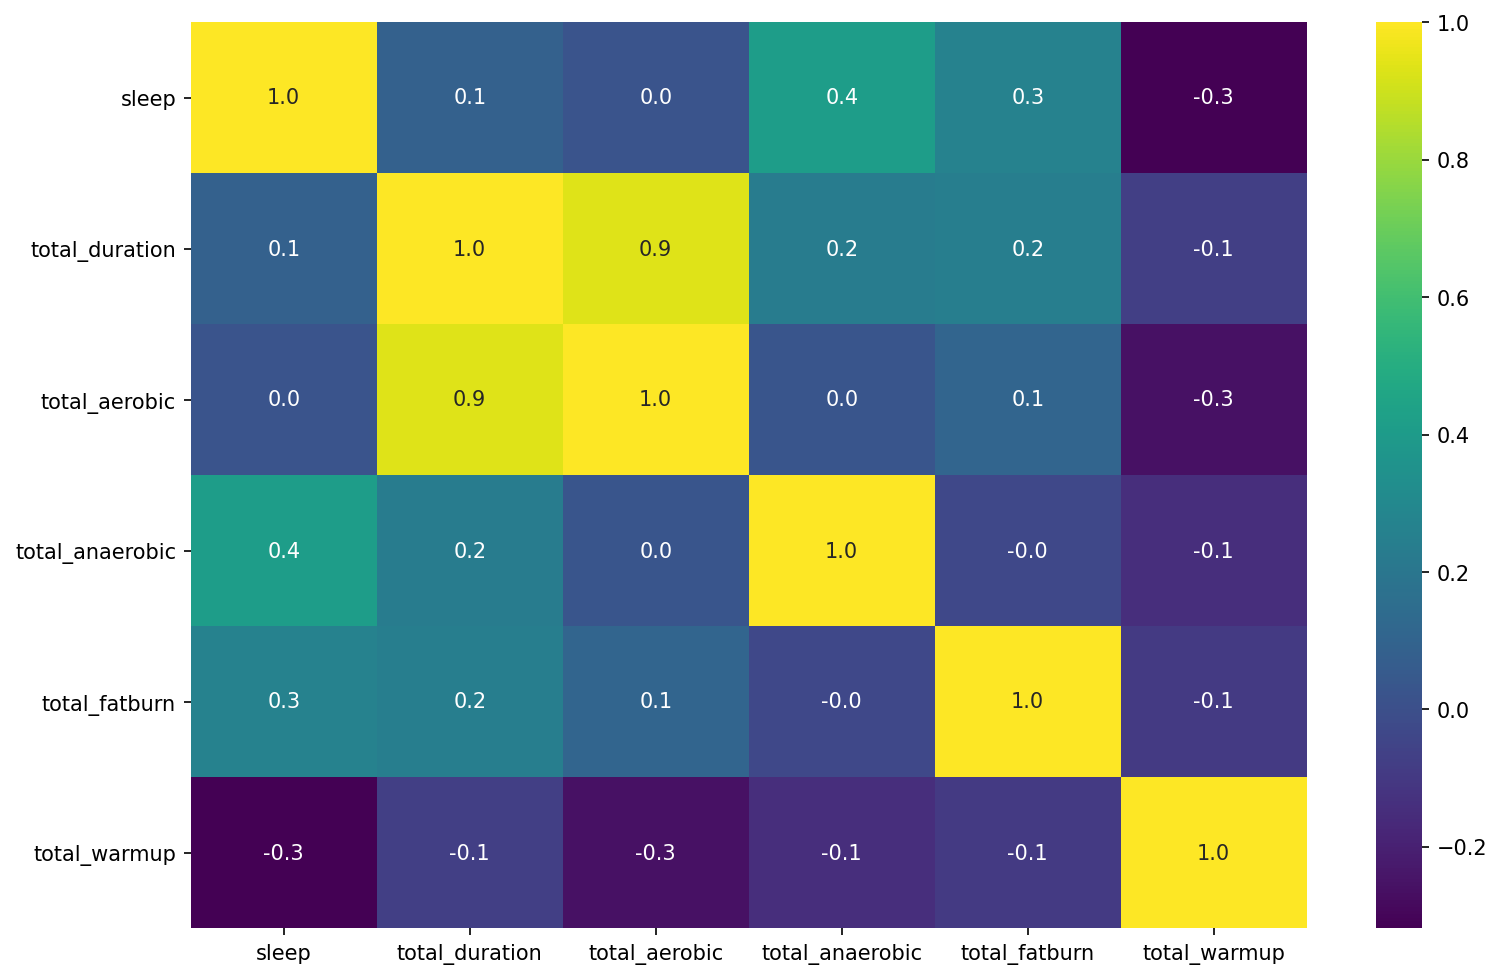

In [46]:
sns.heatmap(corr_sleep,annot=True,cmap='viridis',fmt='.1f')

<AxesSubplot:>

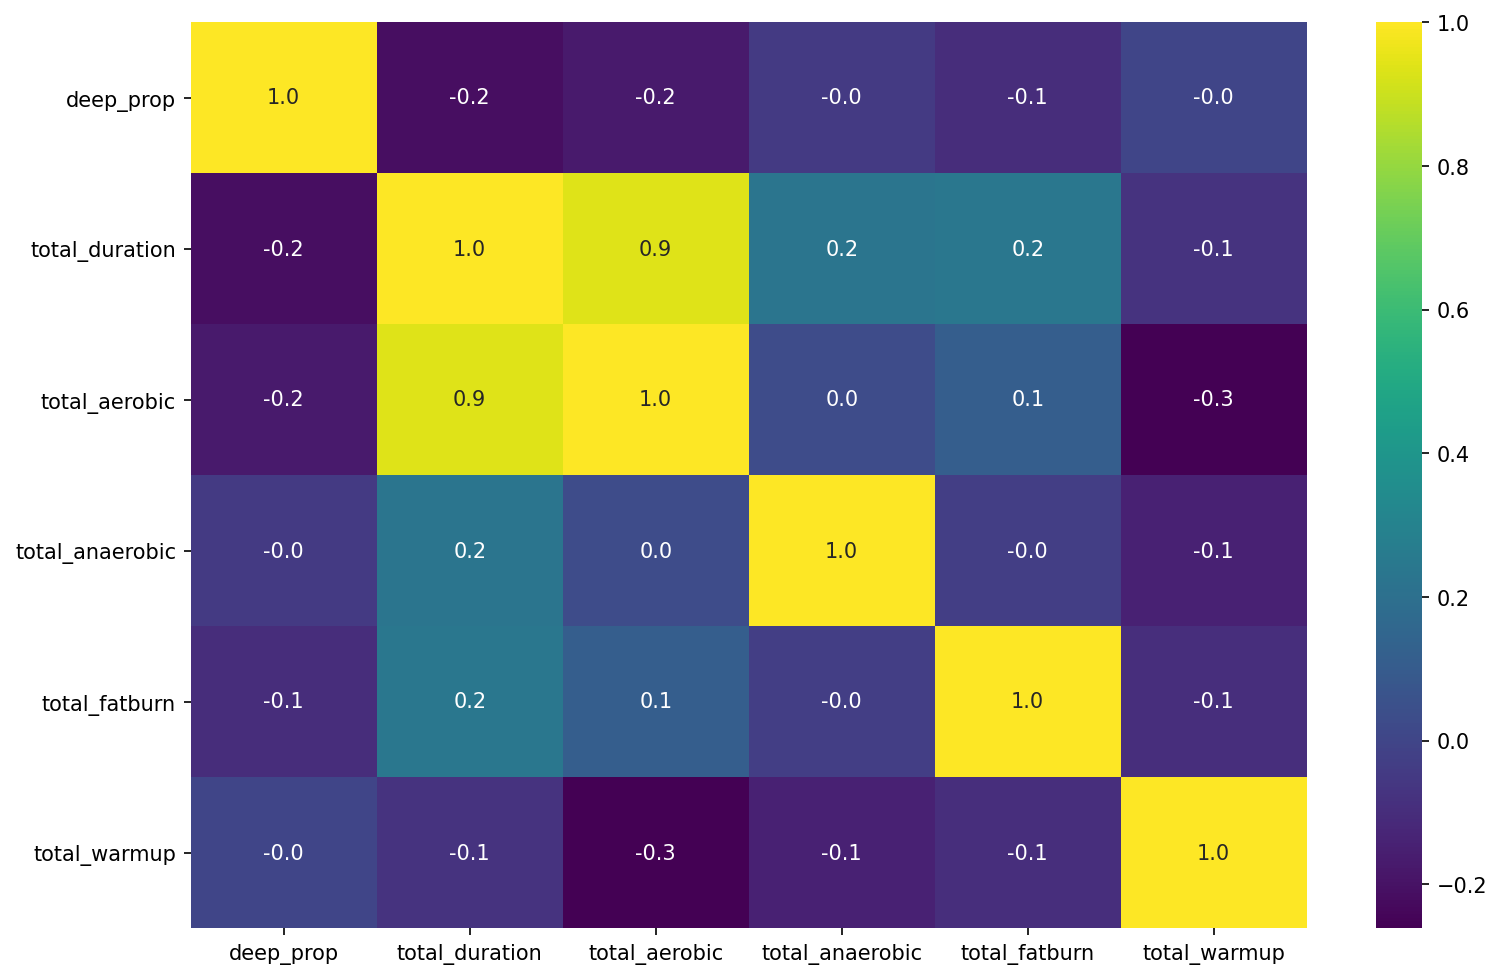

In [47]:
sns.heatmap(corr_deep,annot=True,cmap='viridis',fmt='.1f')

<AxesSubplot:>

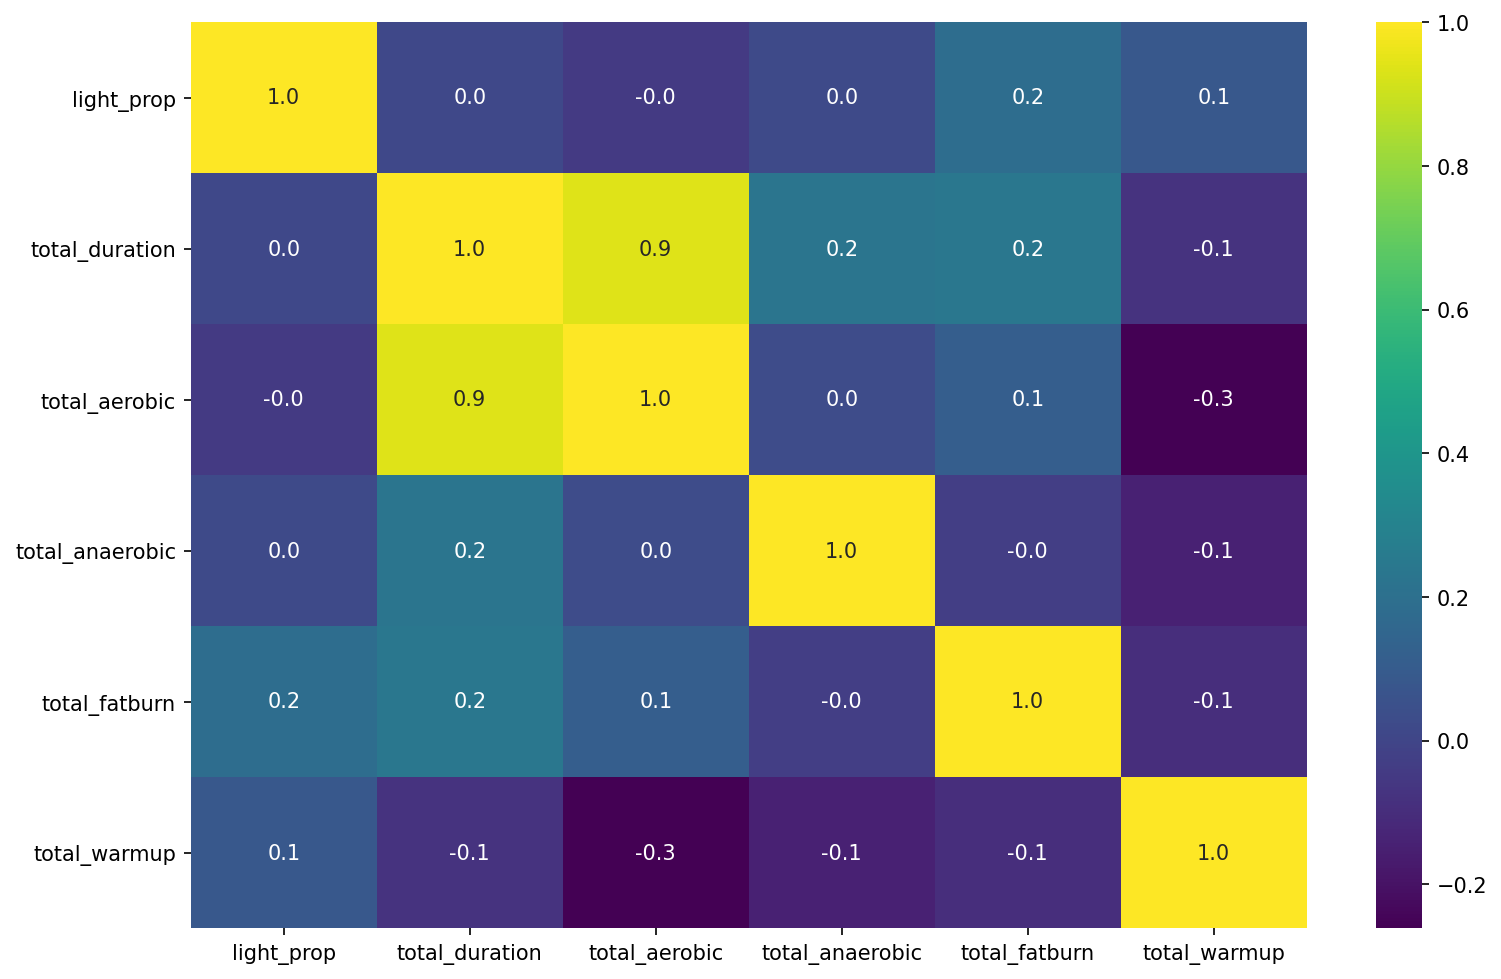

In [48]:
sns.heatmap(corr_light,annot=True,cmap='viridis',fmt='.1f')

<AxesSubplot:>

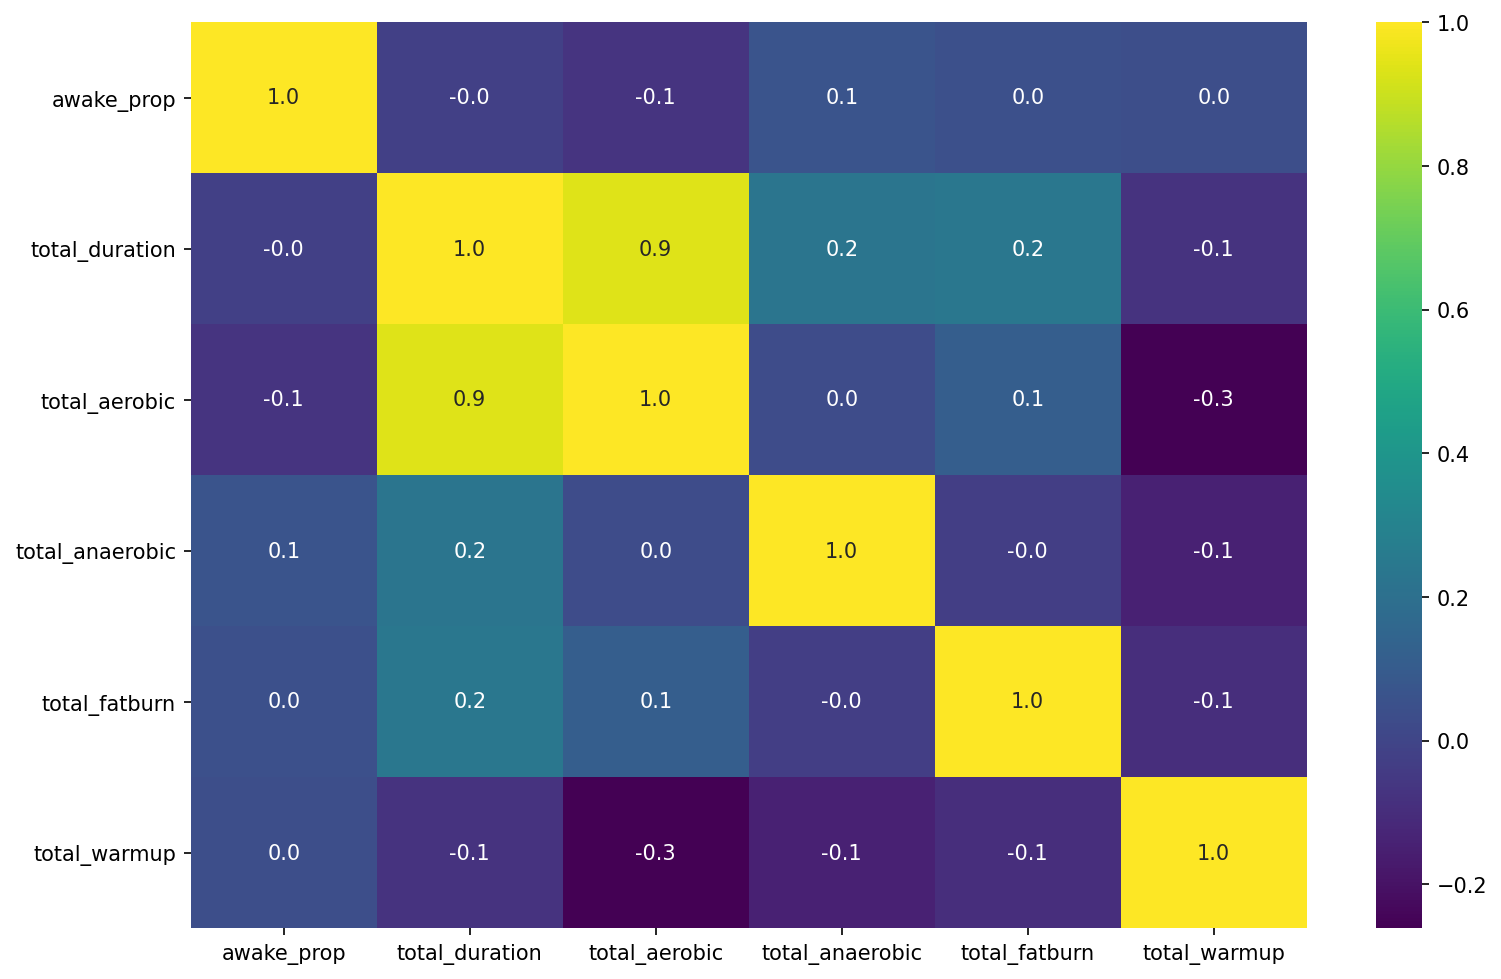

In [49]:
sns.heatmap(corr_awake,annot=True,cmap='viridis',fmt='.1f')

<AxesSubplot:>

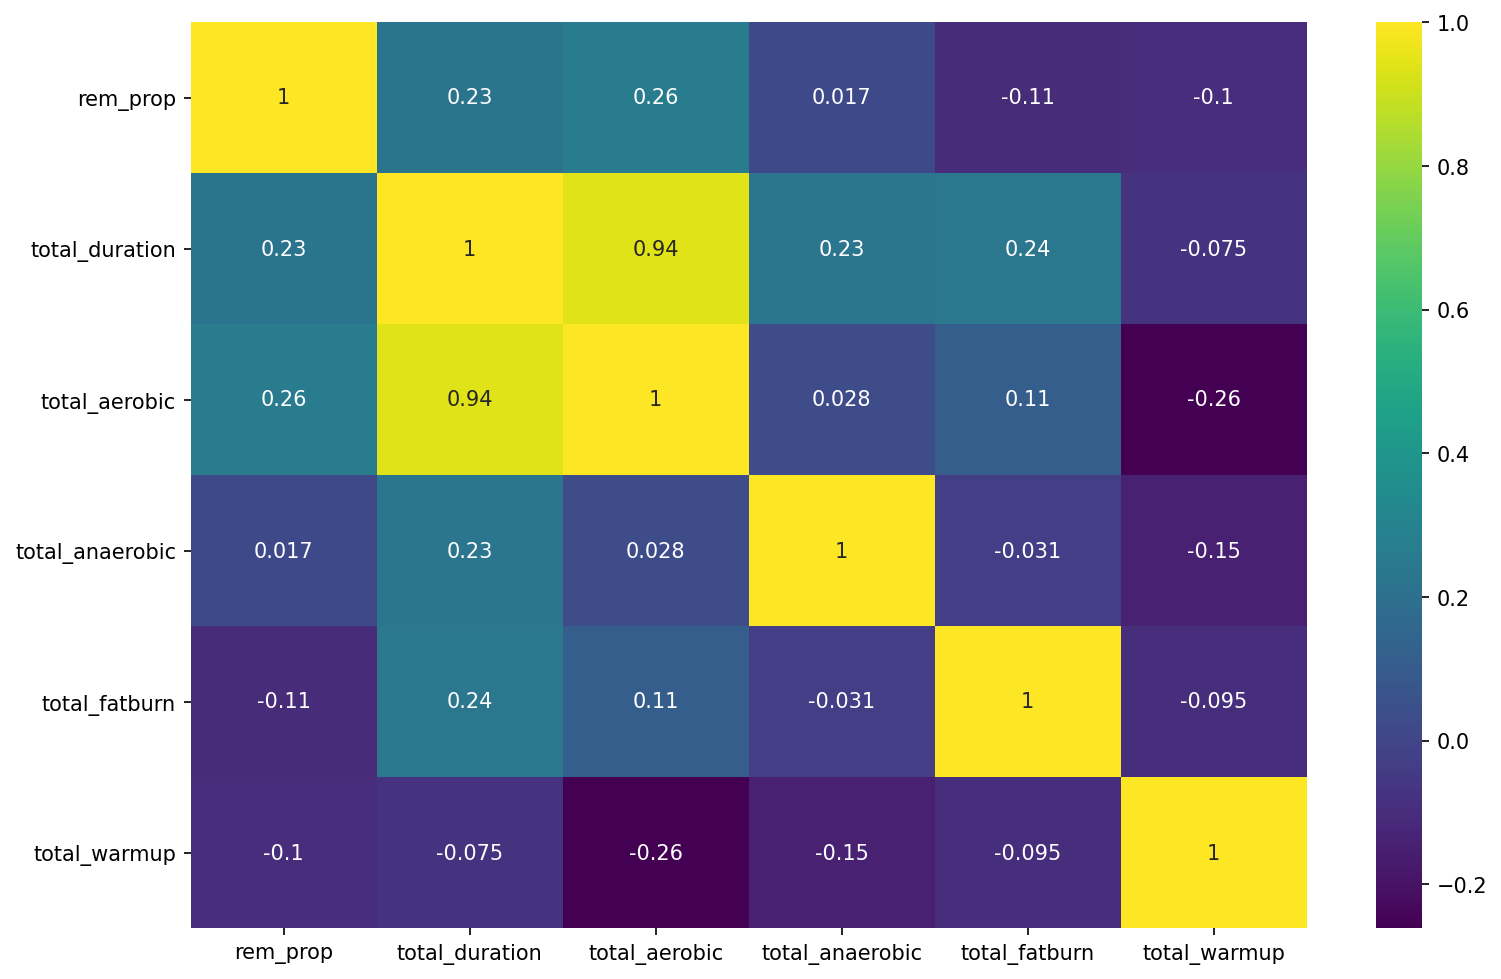

In [45]:
sns.heatmap(corr_rem,annot=True,cmap='viridis')

**Total sleep duration** <br>
1. positive correlation with total anaerobic, fatburn
2. small positive correlation with total duration
3. no correlation with total aerobic
4. negative correlation with total warmup 

**Proportion of deep sleep** <br>
1. small negative correlation with total duration, total aerobic, and total fatburn
2. no correlation with total anaerobic and total warmup

**Proportion of light sleep** <br>
1. small positive correlation with total fatburn and total warmup
2. no correlation with total duration, total aerobic, total anaerobic

**Proportion of awake** <br>
1. small negative correlation with total aerobic
2. small positive correlation with total anaerobic
3. no correlation with total duration, total fatburn, and total warmup

**Proportion of rem** <br>
1. positive correlation with total duration, total aerobic
2. very small positive correlation with total anaerobic
3. small negative correlation with total fatburn and total warmup